## AI Academic Advisor: Web Scraping - Data Cleaning - Data Manipulation

### Introduction to Data Manipulation for AI Academic Advisor

To build an intelligent academic advising system for the AI Academic Advisor, I conducted web scraping to collect structured data on courses and majors offered at the University of Illinois at Urbana-Champaign. This process allowed me to automate the retrieval of relevant academic information and organize it for efficient use in the system.

The data manipulation process involved:

Web Scraping Majors:
- Extracted a list of LAS and Grainger Engineering majors from university sources.
- Cleaned and structured the data to ensure accuracy and consistency.
- Removed duplicates and irrelevant entries to focus on relevant programs.

Web Scraping Courses:
- Collected course listings, including course names, descriptions, and relevant attributes.
- Processed and formatted the course data into a structured dataframe for easy access.
- Ensured that course details align with major requirements and student preferences.

Organizing and Cleaning Data:
- Standardized the scraped datasets into clear dataframes, making them suitable for further analysis.
- Formatted course and major data for smooth integration with the AI-driven recommendation system.
- By successfully scraping and organizing this data, I have created a solid foundation for the AI Academic Advisor to provide accurate, structured academic information to students.

### Web Scraping

In [37]:
import requests
import json
import pandas as pd

# 🔹 Replace with your actual API URL
api_url = "https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/data/out_full.json"

# 🔹 Headers (copy from DevTools if needed)
headers = {
    "User-Agent": "Mozilla/5.0",
    "Referer": "https://courses.illinois.edu/",
    "Accept": "application/json"
}

# 🔹 Fetch JSON data
response = requests.get(api_url, headers=headers)

# 🔹 Parse JSON
if response.status_code == 200:
    data = response.json()
else:
    print(f"Error {response.status_code}: Failed to fetch data")
    exit()


In [38]:
course_list = []

for course in data:
    course_code = course.get("course", "Unknown Course")

    # Each instructor represents a different section of the class
    if "instructors" in course and isinstance(course["instructors"], list):
        for instructor_data in course["instructors"]:
            course_title = instructor_data.get("Course Title", "No Title")
            course_subject = instructor_data.get("Course Subject", "Unknown Subject")
            instructor = instructor_data.get("instructor", "No Instructor")
            section_count = instructor_data.get("sections", "N/A")
            avg_gpa = instructor_data.get("avgGPA", "N/A")
            students_enrolled = instructor_data.get("countGPA", "N/A")  # Number of students who got a GPA

            # Append data as a separate row for each section+professor
            course_list.append({
                "Course Code": course_code,
                "Title": course_title,
                "Subject": course_subject,
                "Instructor": instructor,
                "Sections": section_count,
                "Students Enrolled": students_enrolled,
                "Average GPA": avg_gpa
            })

In [39]:
# 🔹 Convert to DataFrame and Save
courses_df = pd.DataFrame(course_list)
courses_df.to_csv("uiuc_courses.csv", index=False)

print(f"The length of the dataframe created is {len(courses_df)}")
courses_df.head()

The length of the dataframe created is 10641


,Course Code,Title,Subject,Instructor,Sections,Students Enrolled,Average GPA
0,AAS 100,Intro Asian American Studies,AAS,All Sections,78,2055,3.488501
1,AAS 100,Intro Asian American Studies,AAS,"Shin, J.",4,94,3.737979
2,AAS 100,Intro Asian American Studies,AAS,"Rosado-Torres, A.",3,80,3.733750
3,AAS 100,Intro Asian American Studies,AAS,"Horton, C.",4,112,3.678661
4,AAS 100,Intro Asian American Studies,AAS,"Kim, G.",2,48,3.653125


**Scraping the Data:** I used the requests library to send an HTTP GET request to an API endpoint containing grade disparity data for UIUC courses. The request included headers to mimic a real browser request and ensure access.

**Observing the Data Format:** After retrieving the JSON response, I examined the structure, particularly focusing on course codes, instructors, sections, and GPA-related information. This helped identify how the data was nested and what needed to be extracted.

**Creating the Proper List:** I initialized an empty list (course_list) and iterated through the JSON data, extracting relevant fields such as course code, title, subject, instructors, section count, and GPA details. Each instructor was treated as a unique entry to ensure accurate representation.

**Appending Data into a DataFrame:** For each course and instructor, I stored the extracted information as a dictionary and appended it to course_list. This structured list was then converted into a pandas DataFrame for easier manipulation and analysis.

In [40]:
full_courses_df = courses_df[courses_df["Instructor"] == "All Sections"]
courses_df.drop(courses_df[courses_df["Instructor"] == "All Sections"].index, inplace=True)

full_courses_df.head(10)

,Course Code,Title,Subject,Instructor,Sections,Students Enrolled,Average GPA
0,AAS 100,Intro Asian American Studies,AAS,All Sections,78,2055,3.488501
21,AAS 120,Intro to Asian Am Pop Culture,AAS,All Sections,3,82,3.589878
25,AAS 200,U.S. Race and Empire,AAS,All Sections,7,226,3.522566
32,AAS 215,US Citizenship Comparatively,AAS,All Sections,5,157,3.664522
40,ABE 100,Intro Agric & Biological Engrg,ABE,All Sections,3,95,3.687474
54,ABE 436,Renewable Energy Systems,ABE,All Sections,3,91,3.494396
60,ABE 498,Eng Design for Solar SmartHome,ABE,All Sections,2,61,3.918361
65,ACCY 200,Fundamentals of Accounting,ACCY,All Sections,27,4633,3.442417
70,ACCY 201,Accounting and Accountancy I,ACCY,All Sections,35,4405,3.092356
74,ACCY 202,Accounting and Accountancy II,ACCY,All Sections,42,3807,3.256181


In [41]:
courses_df.head(10)
##course code will be rv

,Course Code,Title,Subject,Instructor,Sections,Students Enrolled,Average GPA
1,AAS 100,Intro Asian American Studies,AAS,"Shin, J.",4,94,3.737979
2,AAS 100,Intro Asian American Studies,AAS,"Rosado-Torres, A.",3,80,3.733750
3,AAS 100,Intro Asian American Studies,AAS,"Horton, C.",4,112,3.678661
4,AAS 100,Intro Asian American Studies,AAS,"Kim, G.",2,48,3.653125
5,AAS 100,Intro Asian American Studies,AAS,"Mukhopadhyay, A.",5,126,3.611270
6,AAS 100,Intro Asian American Studies,AAS,"Boonsripaisal, S.",6,175,3.579257
7,AAS 100,Intro Asian American Studies,AAS,"Lee, S.",4,102,3.529706
8,AAS 100,Intro Asian American Studies,AAS,"Zheng, R.",9,227,3.518634
9,AAS 100,Intro Asian American Studies,AAS,"Atienza, P.",4,107,3.511028
10,AAS 100,Intro Asian American Studies,AAS,"Wang, Y.",14,356,3.492612


In [42]:
import requests
from bs4 import BeautifulSoup
import spacy
import pandas as pd
import time

# Load NLP model for keyword extraction
nlp = spacy.load("en_core_web_sm")

# Function to extract major details
def get_major_details(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract Major Name
    major_name_tag = soup.find("h1", class_="major-h1")
    major_name = major_name_tag.text.strip() if major_name_tag else "Unknown Major"

    # Extract Description
    desc_section = soup.find("div", class_="programDescription")
    description = desc_section.find("p").text.strip() if desc_section else "No description found."

    # Extract Career Options
    career_section = soup.find("div", class_="programCareerExamples")
    career_list = career_section.find_all("li") if career_section else []
    career_options = [career.text.strip() for career in career_list] if career_list else ["No career options listed."]

    # Extract Related Majors
    related_majors_section = soup.find("div", class_="relatedMajors")
    related_majors = [
        link.text.strip() for link in related_majors_section.find_all("a", class_="data-description")
    ] if related_majors_section else ["No related majors found."]

    return major_name, description, career_options, related_majors

# Function to extract keywords using NLP
def extract_keywords(text):
    doc = nlp(text.lower())  # Convert text to lowercase
    keywords = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return list(set(keywords))  # Remove duplicates

# Store scraped data
major_data = []

# List of major links (Replace this with your full list)
major_links = [
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0323BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP6131BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP5532BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM0071BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM6077BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR4081BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0461BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KT0277BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP4048BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV1008BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5003BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5006BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5163BSAG",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP5163BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/ACE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL6080BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5736BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/ALEC",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL0177BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL0002BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0340NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR4091BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR5720BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0169BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR5896BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5526BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR4090NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5621NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5526BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0333BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV6072BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV6075BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV6072BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0334BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0342BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KY5460BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0150BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL6143BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL0048BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR6142BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0127BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10LP5695BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10LP6074BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM5597BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0438BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV3865BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0305BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KT0278BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KY0351BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0156BLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5246NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0286BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5167BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KN5391BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR4084BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0301BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV6039BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR5646BMA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM5073BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM1432BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0130BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0439NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV1438BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0133BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0318BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KT5201BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0408BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KN5422BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0314NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0433BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5876BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0265BA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM6146BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0159BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM0070NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0168BME",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0300BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0158BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR5045BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0106BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0161BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0308NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0157BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5164BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR1481BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP5183BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0332BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0240BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0343NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0306BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5197BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV4097BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5459BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0344BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0307BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0329BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0464BSLA"
]

for url in major_links:
    details = get_major_details(url)
    if details:
        major_name, description, career_options, related_majors = details

        # Extract keywords from description
        description_keywords = extract_keywords(description)

        major_data.append({
            "Major": major_name,
            "Description": description,
            "Keywords": ", ".join(description_keywords),
            "Career Options": ", ".join(career_options),
            "Related Majors": ", ".join(related_majors)
        })

    time.sleep(1)  # Add delay to prevent rate limiting

# Convert to DataFrame
major_data_df = pd.DataFrame(major_data)

# Save to CSV and JSON
major_data_df.to_csv("major_keywords_fixed.csv", index=False)
major_data_df.to_json("major_keywords_fixed.json", orient="records", indent=4)


This script performs automated web scraping of UIUC major information and organizes it into a structured dataset. Using libraries like requests and BeautifulSoup, the script visits a list of major detail pages on the MyIllini website. Each page is parsed to extract the major name, its program description, a list of possible career paths, and any related majors linked on the page. To ensure robustness, the script includes error handling for request failures and uses user-agent headers to mimic a browser request. Additionally, it incorporates a delay (time.sleep(1)) between requests to avoid triggering rate limits or bans from the server.

Beyond basic scraping, the code integrates Natural Language Processing (NLP) with SpaCy to extract keywords from each major’s description. This step allows for later grouping, clustering, or searching based on meaningful terms students might associate with a major. The extracted keywords are filtered to remove stop words and duplicates, creating a compact summary of each major’s content. All the gathered data is compiled into a Python list of dictionaries, which is then converted into a Pandas DataFrame.

Finally, the dataset is saved in both CSV and JSON formats for flexibility in usage across frontend and backend environments. This process lays the foundation for integrating academic major data into the AI Academic Advisor application, enabling functionalities like smart major recommendations and content-based filtering. The structured output not only helps with presenting information to students but also opens doors for machine learning applications like clustering or semantic search.

In [43]:
major_data_df.head()

,Major,Description,Keywords,Career Options,Related Majors
0,Neuroscience,Neuroscience is the study of the nervous syste...,"neurochemistry, neuroscience, information, cau...","Physician, Physical Therapist, Speech Therapis...","Biochemistry - LAS, Integrative Biology - LAS,..."
1,Neural Engineering,Neural engineers apply engineering principles ...,"design, noninvasive, neuroscience, efforts, ri...","Healthcare Engineer, Neuroengineer, Data Platf...","Bioengineering - ENG, Biology - LAS, Electrica..."
2,Systems Engineering and Design,This major provides a solid foundation in math...,"business, lead, major, risks, engineering, sys...","Administration, Automotive, control systems, &...","Engineering Mechanics - ENG, Materials Science..."
3,Accountancy,"Accountancy is about the recording, analysis, ...","business, admitted, reporting, analyze, inform...","Corporate accounting, Forensic consulting, Gov...","Accountancy + Data Science - BUS, Agri-Account..."
4,Accountancy + Data Science,All business is being transformed by technolog...,"business, auditors, admitted, globe, tax, comb...","Financial modeling & research, Data science fi...","Accountancy - BUS, Astronomy + Data Science - ..."


### Data Visualization

##Test Code

In [46]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data
text_data = major_data_df["Related Majors"]

#convert text into meaning for the model
model = SentenceTransformer('all-MiniLM-L6-v2')
X_embed = model.encode(text_data, show_progress_bar=True)

# using UMAP (preserves cluster structure which overall makes it btr)
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_embed)

# Find best number of clusters (k) using silhouette score
best_score = -1
best_k = 2
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_umap)
    score = silhouette_score(X_umap, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels





Batches: 100%|██████████| 4/4 [00:00<00:00, 17.85it/s]

k=2, Silhouette Score=0.501
k=3, Silhouette Score=0.541
k=4, Silhouette Score=0.515
k=5, Silhouette Score=0.484
k=6, Silhouette Score=0.486
k=7, Silhouette Score=0.500
k=8, Silhouette Score=0.534
k=9, Silhouette Score=0.514
k=10, Silhouette Score=0.517

✅ Best number of clusters: 3
✅ Best silhouette score: 0.541



/Users/christopherwilliams/Desktop/AI-Advisor/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/christopherwilliams/Desktop/AI-Advisor/venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [47]:
print(f"\n Best number of clusters: {best_k}")
print(f" Best silhouette score: {best_score:.3f}")



 Best number of clusters: 3
 Best silhouette score: 0.541


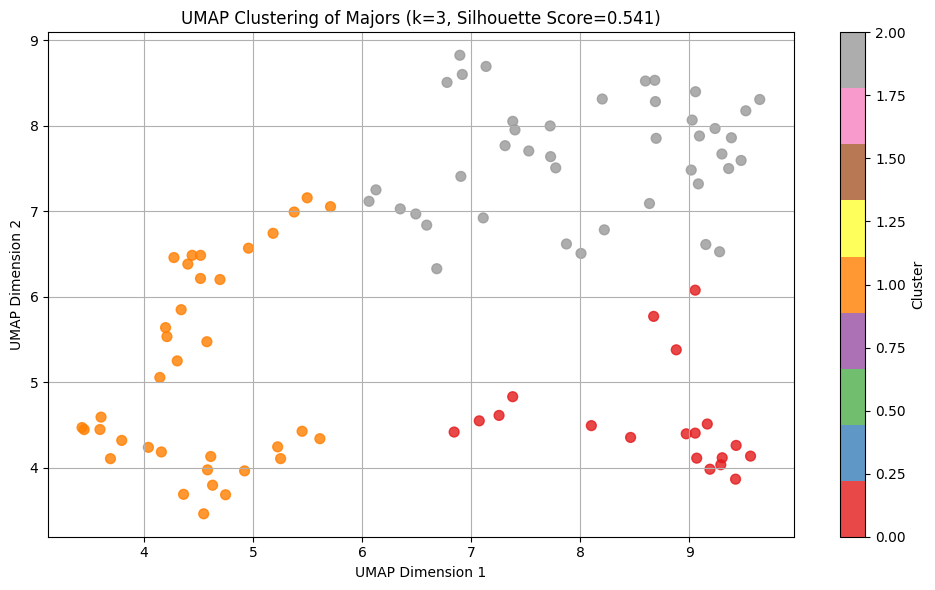

In [34]:
#  best cluster goes to the DataFrame
major_data_df["Cluster"] = best_labels

# Plot final clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=best_labels, cmap='Set1', s=50, alpha=0.8)
plt.title(f"UMAP Clustering of Majors (k={best_k}, Silhouette Score={best_score:.3f})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

This visualization shows the results of clustering majors using UMAP for dimensionality reduction and KMeans for grouping. Each point in the scatter plot represents a major, and its position reflects how similar it is to other majors based on the "Related Majors" text. The color indicates which of the three clusters it belongs to. UMAP performs dimensionality reduction, which means it takes the complex, high dimensional data created by SentenceTransformer (384 features per major) and compresses it into just two dimensions. This makes the data easier to visualize while preserving the structure and relationships between majors. KMeans then groups the points into three distinct clusters, as determined by the highest silhouette score of 0.541 indicating moderate separation and consistency within clusters. Overall, the graph reveals meaningful groupings of majors based on their semantic similarity.

Majors with similar related fields are placed closer together, suggesting shared themes or overlapping subject areas. The colorbar on the right shows the cluster index, ranging from 0 to 4, indicating five distinct clusters. This type of visualization can help identify groups of similar majors, which is useful for academic advising and major exploration tools. Ultimately, the plot provides an intuitive way to explore relationships between fields of study based on their content and relatedness.

### Summary

This part of the project was essential for organizing and understanding the vast number of majors offered at UIUC, particularly in LAS and Grainger Engineering. By web scraping major details such as descriptions, career paths, and related majors, I created a structured dataset that captures the academic and thematic connections between majors. Applying NLP to extract keywords and clustering the majors allowed me to visualize and analyze their similarities in a meaningful way. This not only supports the functionality of the AI Academic Advisor tool, but also lays the foundation for personalized major recommendations.

The clustering enables the backend to suggest similar majors to users based on their interests, academic goals, or previously selected fields. It also improves the user experience by offering logical transitions for students exploring or switching majors. To complete the rest of the project, I will use Flask to build out the backend API routes, which will serve the processed data and model predictions to the front-end interface I’ve already developed. This includes endpoints for recommending majors, building schedules, and identifying alternate paths based on a student’s goals. I’ll also connect my cleaned CSV and JSON files into these routes so that real user input can generate dynamic results. By combining Flask, pandas, and my scraped data, I’ll be able to create a fully functional full-stack academic advising tool that delivers smart, interactive, and personalized experiences for students at UIUC.